# NoSQL Database Exercise - MongoDB Spatial

Big GeoData Processing 

By: Mahdi Farnaghi

## **Introduction to MongoDB**

MongoDB is a popular NoSQL database that provides a scalable and high-performance platform for storing and processing a wide variety of data types, including spatial data. Unlike traditional relational databases, MongoDB stores data in a JSON-like format called BSON (Binary JSON), which allows for dynamic and flexible schema design. This makes MongoDB particularly suitable for modern applications that deal with diverse data types and structures.

### **Why Use MongoDB for Spatial Data?**
MongoDB supports geospatial data natively, allowing you to store complex geographical shapes, create geospatial indexes, and perform spatial queries efficiently. These capabilities make MongoDB an excellent choice for applications that need to handle location-based services, mapping, geographic information systems (GIS), and more.

Before we go deep, let us have a little bit of recap from the previous lecture about CAP and BASE.

### **CAP Theorem in Distributed Databases**
The **CAP theorem** (also known as Brewer's theorem) is a fundamental principle in distributed database systems that states a database can only guarantee two out of three properties at any given time:
1. **Consistency**: Every read receives the most recent write. In other words, all nodes in the database reflect the same data at a given moment.
2. **Availability**: Every request (read or write) receives a response, even if some nodes in the system are down.
3. **Partition Tolerance**: The system continues to function despite communication breakdowns or network failures between nodes.

Given the CAP theorem, distributed databases like MongoDB have to make trade-offs:
- **CP (Consistency and Partition Tolerance)**: Systems that prioritize consistency will return errors or delay responses during network partitions to ensure that all nodes have the same data. 
- **AP (Availability and Partition Tolerance)**: Systems that prioritize availability will return the most current available data even if the network is partitioned, potentially sacrificing consistency.

**MongoDB** falls into the **AP (Availability and Partition Tolerance)** category. It is designed to provide high availability and partition tolerance, making it suitable for large-scale applications that require robust data handling even in the presence of network failures.

### **BASE Principle**
In contrast to the **ACID** properties of traditional relational databases (Atomicity, Consistency, Isolation, Durability), MongoDB adheres to the **BASE** principle:
1. **Basically Available**: The database is always available to respond to queries, though the data returned may not always be the most recent.
2. **Soft State**: Data is not always in a consistent state across the database due to eventual consistency. The state of data can change over time as updates propagate.
3. **Eventual Consistency**: Given enough time, the database will eventually reach a consistent state where all nodes reflect the most recent updates.

MongoDB's **BASE** properties make it a suitable choice for scenarios where availability, flexibility, and scalability are more critical than strict consistency. For example, in geospatial applications like tracking the real-time location of vehicles, users often prioritize getting data quickly (even if slightly out-of-date) over waiting for perfectly consistent data across all nodes.

## Spatial data processing capabilities of MongoDB
MongoDB provides a range of spatial data processing capabilities that are essential for working with geospatial data. These functionalities allow users to store, index, and query spatial data efficiently. Here’s a list of spatial data processing features in MongoDB that should be covered in a comprehensive tutorial:

### 1. **Spatial Data Storage and GeoJSON Support**
   - **Storing Spatial Data**: MongoDB supports storing geospatial data in GeoJSON format, which includes geometry types like:
     - `Point`: Represents a specific coordinate (latitude, longitude).
     - `LineString`: A series of connected points representing a line.
     - `Polygon`: Defines an area enclosed by a series of coordinates.
     - `MultiPoint`, `MultiLineString`, `MultiPolygon`: Collections of points, lines, or polygons.
     - `GeometryCollection`: A group of different geometries.
   - **Arrays of Coordinates**: MongoDB also allows storing coordinates directly as arrays for simple `2d` indexes.

### 2. **Geospatial Indexing**
   - **`2dsphere` Index**: Designed for queries on spherical surfaces like Earth. It supports various GeoJSON geometries, including `Point`, `LineString`, and `Polygon`.
   - **`2d` Index**: An older index type optimized for storing planar geometry (e.g., flat maps). Typically used for legacy systems or non-GeoJSON data.
   - **Compound Indexes**: Combining geospatial indexes with other types of indexes (e.g., text, numeric) for complex queries that filter on multiple fields.

### 3. **Geospatial Queries**
   MongoDB provides several geospatial query operators to work with spatial data:
   - **`$geoWithin`**: Finds documents within a specified geometry (Polygon, MultiPolygon, etc.). This operator is useful for queries like finding points of interest within a city or neighborhood.
   - **`$geoIntersects`**: Returns documents that intersect with a given geometry. This can be used to find routes or paths that cross a specific area.
   - **`$near` and `$nearSphere`**: Returns documents sorted by their proximity to a specified point. This is helpful for location-based queries, such as finding the nearest subway stations or restaurants.
   - **`$geoNear`**: A specialized aggregation stage that sorts documents by proximity to a point and provides additional control over distance and spherical calculations.

### 4. **Distance Calculations**
   - **`$maxDistance`**: Used in conjunction with `$near` and `$geoWithin` to limit query results to those within a certain distance from a point.
   - **Spherical Geometry Calculations**: MongoDB uses spherical calculations (e.g., Haversine formula) to compute distances on an Earth-like sphere when using `2dsphere` indexes.
   - **Metric Conversions**: MongoDB supports distance queries in meters (for `2dsphere`) and arbitrary units (for `2d` indexes).

### 5. **Aggregation Framework and Geospatial Processing**
   - **`$geoNear`** Aggregation Stage: An advanced operation within MongoDB’s aggregation pipeline that sorts documents by proximity to a given point and can return distances as part of the output.
   - **Combining Aggregation with Geospatial Queries**: Combining geospatial queries with other aggregation operations (`$match`, `$group`, `$project`, etc.) for more complex data processing tasks, such as calculating the average population density within a set of spatial regions.
   
### 6. **Geospatial Data Validation**
   - **GeoJSON Validation**: MongoDB checks that the GeoJSON objects stored in the database are valid. For example, a polygon's ring must be closed, and its coordinates must be in valid ranges.
   - **Automatic Error Handling**: MongoDB provides error messages for invalid spatial data formats or incorrect usage of geospatial operators.

### 7. **Complex Spatial Data Manipulation**
   - **Multi-Geometry Handling**: MongoDB can handle complex geometries like `MultiPolygon`, `MultiLineString`, and `GeometryCollection`, allowing for the storage and querying of intricate spatial features.
   - **Clipping and Cutting Geometries**: While MongoDB does not natively support complex spatial operations like clipping or buffering geometries, it can store results of such operations performed in external GIS tools or libraries (e.g., `shapely`, `geopandas` in Python) and perform further spatial queries on them.

### 8. **Geo-Specific Use Cases**
   - **Polygon Intersection and Inclusion**: Determine whether geographical features (e.g., parcels of land, neighborhoods) intersect with other shapes, such as finding census blocks within a specific district.
   - **Neighborhood and Route Analysis**: Use geospatial queries to analyze network features like roadways and public transportation routes.
   - **Spatial Clustering**: Although MongoDB does not directly provide spatial clustering (like DBSCAN), students can combine MongoDB's spatial queries with external Python libraries to implement such clustering and then store and visualize the clusters within MongoDB.

### 9. **Spatial Data Index Optimization**
   - **Index Design**: Guide students through best practices for designing indexes for geospatial queries, including creating compound indexes for queries that combine geospatial data with other criteria (e.g., timestamp, category).
   - **Performance Tuning**: Teach how to monitor query performance using MongoDB's explain plan to identify if queries are using the geospatial indexes effectively.

### 10. **Real-Time Spatial Analysis**
   - **Change Streams**: Use MongoDB's change streams to monitor real-time changes to geospatial data, such as tracking updates to the location of moving objects (e.g., vehicles, deliveries).


## Readings

Read Geospatial Queries

## **Tutorial**

Prerequisites:

1. Python 3.x installed.
2. MongoDB installed locally or access to a MongoDB server.
3. MongoDB Python driver (pymongo) and spatial data visualization libraries (geopandas, matplotlib, and folium) installed.
4. Sample NYC data files in GeoJSON format or JSON with spatial coordinates.

### Step 1: Install Required Python Packages

Install the required Python packages:

In [5]:
#!pip install -q pymongo geopandas folium matplotlib

In [2]:
import os
# CHange the directory here if you dont want to sepcify complete paths to the data files
os.chdir(r'C:\Users\n\Desktop\Big Geodata Processing\Mongo Exercise\nosql_nyc_data_json')

Specify the path the folder that include NYC data

In [3]:
data_path = 'nyc_data_json'

### Step 2: Start MongoDB Server (Mac and Windows Instructions)

Before you can begin working with spatial data in MongoDB, you need to ensure that the MongoDB server is running on your machine. The steps vary slightly depending on whether you're using macOS or Windows. Here's how to get started on each platform:

#### **For macOS Users:**

1. **Install MongoDB**:

   - Open Terminal and install Homebrew if you haven't already:

     ```bash
     /bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"
     ```

   - Install MongoDB using Homebrew:

     ```bash
     brew tap mongodb/brew
     brew install mongodb-community@6.0
     ```

   - After installation, add MongoDB to your PATH (optional):

     ```bash
     echo 'export PATH="/usr/local/opt/mongodb-community@6.0/bin:$PATH"' >> ~/.zshrc
     source ~/.zshrc
     ```

2. **Start MongoDB**:

   - To start the MongoDB server, run:

     ```bash
     brew services start mongodb/brew/mongodb-community
     ```

   - To stop the MongoDB server when you are finished:

     ```bash
     brew services stop mongodb/brew/mongodb-community
     ```

3. **Verify MongoDB is Running**:

   - Open a new Terminal window and type:

     ```bash
     mongo
     ```

   - If everything is set up correctly, you will see the MongoDB shell prompt.

#### **For Windows Users:**

1. **Install MongoDB**:
   - Download the MongoDB installer from the [official MongoDB website](https://www.mongodb.com/try/download/community) for Windows.
   - Follow the installation instructions and make sure to select "Install MongoDB as a Service" during the setup. This option allows MongoDB to run automatically in the background when you start your computer.
   
2. **Start MongoDB**:

   - MongoDB should start automatically if you installed it as a service. However, if you need to start it manually, open the **Command Prompt** with administrator privileges and run:

     ```bash
     net start MongoDB
     ```

   - To stop the MongoDB server, use:

     ```bash
     net stop MongoDB
     ```

3. **Verify MongoDB is Running**:

   - Open the **Command Prompt** and type:

     ```bash
     mongo
     ```

   - If MongoDB is running correctly, you will see the MongoDB shell prompt.

#### **For Both Platforms (Mac and Windows):**

- If you want to specify a custom data directory for MongoDB to store its data files, create a new directory (e.g., `mongodb-data`) and start the server with the following command:

  ```bash
  mongod --dbpath /path/to/your/mongodb-data
  ```
  
  Replace `/path/to/your/mongodb-data` with the actual path to your custom directory.

Now that your MongoDB server is running, you can proceed to the next step, where you will set up a database and import spatial data for processing.

### Step 3: Set Up MongoDB and Import Data

Use the following Python script to connect to MongoDB and import the spatial datasets.

In [4]:
import os
import pymongo
from pymongo import MongoClient
import json
import geopandas as gpd
from shapely.validation import make_valid


# Connect to MongoDB server
client = MongoClient('localhost', 27017)

# Create a new database and collections
db = client['nyc_spatial_data']

# Define data files using data_path
data_files = {
    'nyc_census_blocks': os.path.join(data_path, 'nyc_census_blocks.geojson'),
    'nyc_neighborhoods': os.path.join(data_path, 'nyc_neighborhoods.geojson'),
    'nyc_streets': os.path.join(data_path, 'nyc_streets.geojson'),
    'nyc_subway_stations': os.path.join(data_path, 'nyc_subway_stations.geojson'),
    'nyc_homicides': os.path.join(data_path, 'nyc_homicides.geojson')
}

# Function to convert GeoJSON to EPSG:4326 and clean geometries
def convert_to_epsg_4326(input_geojson, output_geojson):
    # Read the GeoJSON file
    gdf = gpd.read_file(input_geojson)
    
    # Convert the coordinate system to EPSG:4326
    gdf = gdf.to_crs(epsg=4326)
    
    # Clean geometries: fix self-intersections and invalid polygons
    gdf['geometry'] = gdf['geometry'].apply(lambda geom: make_valid(geom) if not geom.is_valid else geom)
    
    # Save the transformed and cleaned GeoJSON
    gdf.to_file(output_geojson, driver='GeoJSON')

# Import data into MongoDB only if the collection is empty
for collection_name, file_path in data_files.items():
    collection = db[collection_name]
    
    # Check if the collection is empty
    if collection.count_documents({}) == 0:
        print(f"Processing '{collection_name}'...")

        # Convert coordinate system if it's a spatial dataset
        if file_path.endswith('.geojson'):
            temp_file_path = os.path.join(data_path, f'transformed_{collection_name}.geojson')
            convert_to_epsg_4326(file_path, temp_file_path)
            file_path = temp_file_path  # Use the transformed file for MongoDB insertion
        
        # Insert data into MongoDB
        with open(file_path) as file:
            data = json.load(file)
            if isinstance(data, dict) and 'features' in data:
                # Handle GeoJSON format
                collection.insert_many(data['features'])
            elif isinstance(data, list):
                # Handle JSON format
                collection.insert_many(data)
        
        print(f"Data inserted into the '{collection_name}' collection successfully.")
    else:
        print(f"Data already exists in the '{collection_name}' collection. Skipping insertion.")

print("Data loading check completed.")


Data already exists in the 'nyc_census_blocks' collection. Skipping insertion.
Data already exists in the 'nyc_neighborhoods' collection. Skipping insertion.
Data already exists in the 'nyc_streets' collection. Skipping insertion.
Data already exists in the 'nyc_subway_stations' collection. Skipping insertion.
Data already exists in the 'nyc_homicides' collection. Skipping insertion.
Data loading check completed.


Check the data in MongoDB Compass:

    Open MongoDB Compass and check to see the database and the data collections created in step 3. 

### Step 4: Create Geospatial Indexes

Indexes optimize query performance, particularly for spatial data. We will create a 2dsphere index on the collections containing spatial data.

In [5]:
# Create 2dsphere index for geospatial queries if it does not exist
collections_to_index = ['nyc_census_blocks', 'nyc_neighborhoods', 'nyc_streets', 'nyc_subway_stations', 'nyc_homicides']

for collection_name in collections_to_index:
    collection = db[collection_name]
    
    # Check if a 2dsphere index on the "geometry" field already exists
    indexes = collection.list_indexes()
    index_exists = any(index['key'] == [('geometry', '2dsphere')] for index in indexes)
    
    if not index_exists:
        collection.create_index([("geometry", "2dsphere")])
        print(f"2dsphere index created for '{collection_name}' collection.")
    else:
        print(f"2dsphere index already exists for '{collection_name}' collection.")

print("Geospatial index check completed.")


2dsphere index created for 'nyc_census_blocks' collection.
2dsphere index created for 'nyc_neighborhoods' collection.
2dsphere index created for 'nyc_streets' collection.
2dsphere index created for 'nyc_subway_stations' collection.
2dsphere index created for 'nyc_homicides' collection.
Geospatial index check completed.


### Step 5: Retrieve Data Using GeoPandas and Render

- Retrieve the neighborhood data from MongoDB.
- Convert it into a GeoDataFrame.
- Render it to display the neighborhoods on a plot.

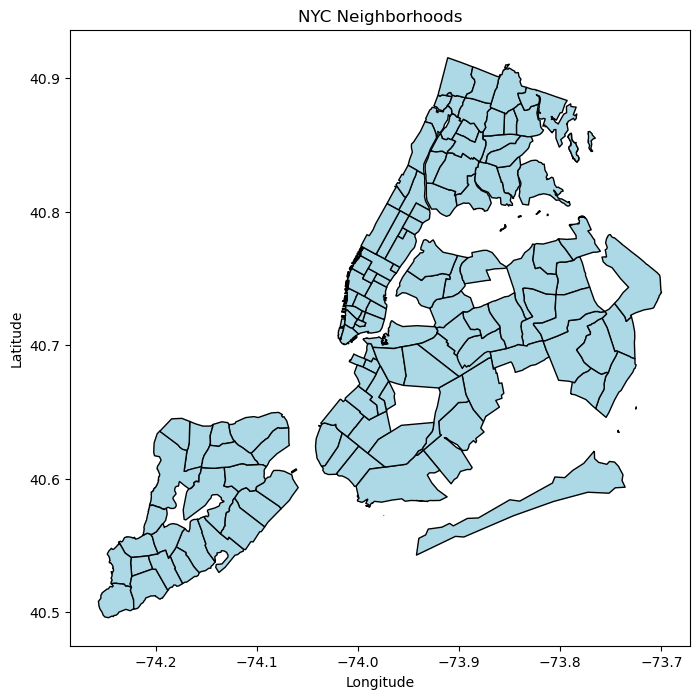

In [6]:
import geopandas as gpd
from shapely.geometry import shape
from matplotlib import pyplot as plt

# Retrieve neighborhood data from MongoDB
neighborhoods_data = list(db['nyc_neighborhoods'].find())

# Extract the geometries and properties
geo_data = []
for neighborhood in neighborhoods_data:
    geometry = shape(neighborhood['geometry'])  # Convert GeoJSON to Shapely geometry
    properties = neighborhood['properties']
    properties['geometry'] = geometry
    geo_data.append(properties)

# Create a GeoDataFrame
gdf_neighborhoods = gpd.GeoDataFrame(geo_data)

# Set the coordinate reference system (CRS) to WGS 84 (EPSG:4326)
gdf_neighborhoods.set_crs(epsg=4326, inplace=True)

# Plot the neighborhoods
gdf_neighborhoods.plot(figsize=(10, 8), edgecolor='black', color='lightblue')
plt.title('NYC Neighborhoods')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


### Step 5: Execute Basic Spatial Queries

Introduce some basic spatial queries to get hands-on experience with geospatial data in MongoDB.

Example 1: Retrieve one record.

In [7]:
sample_neighborhood = db['nyc_neighborhoods'].find_one()
print(sample_neighborhood['properties'])

{'BORONAME': 'Brooklyn', 'NAME': 'Bensonhurst'}


Example 2: Find Neighborhoods Within a Specific Area

In [8]:
query_area = {
    "type": "Polygon",
    "coordinates": [
          [
            [
              -74.26147476695385,
              40.52199880582248
            ],
            [
              -74.26147476695385,
              40.492319878372314
            ],
            [
              -74.21576099232007,
              40.492319878372314
            ],
            [
              -74.21576099232007,
              40.52199880582248
            ],
            [
              -74.26147476695385,
              40.52199880582248
            ]
          ]
        ]
}

neighborhoods = db['nyc_neighborhoods'].find({
    "geometry": {
        "$geoWithin": {
            "$geometry": query_area
        }
    }
})

print("Neighborhoods in the specified area:")
for neighborhood in neighborhoods:
    print(neighborhood['properties']['BORONAME'])


Neighborhoods in the specified area:
Staten Island


Example 3: Find Subway Stations Near a Point

In [9]:
point = {
    "type": "Point",
    "coordinates": [-73.9857, 40.7484]  # Near Times Square
}

nearby_stations = db['nyc_subway_stations'].find({
    "geometry": {
        "$near": {
            "$geometry": point,
            "$maxDistance": 250  # Meters
        }
    }
})

print("Subway stations near the specified point:")
for station in nearby_stations:
    print(station['properties']['NAME'])


Subway stations near the specified point:
34th St


### Step 6: Display Query Results in Tables

Use pandas and geopandas to display query results in a table.

In [10]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape

# Convert MongoDB query results to GeoDataFrame for the neighborhood query
neighborhoods_list = list(db['nyc_neighborhoods'].find({
    "geometry": {
        "$geoWithin": {
            "$geometry": query_area
        }
    }
}))

# Extract properties and geometry for the table
data = [{'name': n['properties']['NAME'], 'boroname':n['properties']['BORONAME'], 'geometry': shape(n['geometry'])} for n in neighborhoods_list]
gdf = gpd.GeoDataFrame(data)

# Set the geometry column and coordinate reference system (CRS) to WGS 84
gdf.set_geometry('geometry', inplace=True)
gdf.set_crs(epsg=4326, inplace=True)

gdf

,name,boroname,geometry
0,Tottensville,Staten Island,"MULTIPOLYGON (((-74.24579 40.51830, -74.24540 ..."


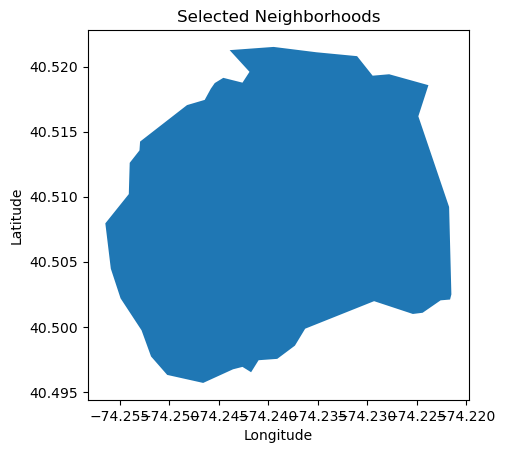

In [11]:

# Plot the GeoDataFrame
gdf.plot()
plt.title('Selected Neighborhoods')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## Exercises

Do the exercises and answer the questions. Provide the code for each exercise and answers to the questions in the designated cell. 



### Exercise 1

Calculate the area of a neighborhood with the name of 'West Village'.

In [12]:
w_village = list(db['nyc_neighborhoods'].find({'properties.NAME' : 'West Village'}))

for v in w_village:
    print(f'Area of West Village: {shape(v['geometry']).area * 111.32 * 111.32} sq.km')

# I used shapely to calculate the area because MongoDB does not provide any function to calculate areas for geometries

Area of West Village: 1.3808754492808077 sq.km


**Question:** 

Did you use the built-in functionalities of MongoDB or Python libraries to calculate the area?

### Exercise 2

What are the names of all the neighborhoods in New York City?

In [13]:
nhoods_nyc = list(db['nyc_neighborhoods'].find({},{"properties.NAME" : 1, "_id": 0}))
for nhood in nhoods_nyc:
    print (nhood['properties']['NAME'])

Bensonhurst
East Village
West Village
Throggs Neck
Wakefield-Williamsbridge
Auburndale
Battery Park
Carnegie Hill
Mariners Harbor
Rossville
Harlem
Gramercy
Queens Village
Middle Village
Ettingville
Morris Park
Baychester
Great Kills
New Brighton
Fordham
Nkew Gardens
Soho
Spuyten Duyvil
Woodside
Bay Ridge
Mott Haven
Rosedale
Boerum Hill
Cobble Hill
Morningside Heights
Murray Hill
Port Richmond
Williams Bridge
Downtown
Woodrow
Union Port
Woodhaven-Richmond Hill
Soundview
Jamaica
Laurelton
Sunset Park
Borough Park
East Brooklyn
Midland Beach
Jackson Heights
Maspeth
Flatbush
Central Park
Charlestown-Richmond Valley
Glendale
Morris Heights
Kings Bridge
Country Club
Park Slope
Greenwich Village
Midtown
Bloomfield-Chelsea-Travis
Richmondtown
Williamsburg
Flushing
Canarsie
Greenwood
Annandale
City Island
Saintalbans
University Heights
Gravesend-Sheepshead Bay
Tribeca
North Sutton Area
Queensboro Hill
Springfield Gardens
Dyker Heights
Upper East Side
Financial District
Inwood
Bedford Park
Sunny

What are the names of all the neighborhoods in Brooklyn?

In [14]:
nhoods_brk = list(db['nyc_neighborhoods'].find({'properties.BORONAME': 'Brooklyn'},{"properties.NAME" : 1, "_id": 0}))
for nhood in nhoods_brk:
    print (nhood['properties']['NAME'])

Bensonhurst
Bay Ridge
Boerum Hill
Cobble Hill
Downtown
Sunset Park
Borough Park
East Brooklyn
Flatbush
Park Slope
Williamsburg
Canarsie
Greenwood
Gravesend-Sheepshead Bay
Dyker Heights
Brownsville
Bushwick
Fort Green
Mapleton-Flatlands
Bedford-Stuyvesant
Carroll Gardens
Coney Island


### Exercise 3

How many records are in the nyc_streets table?

In [15]:
records_nyc_st = db.nyc_streets.count_documents({})
print (f'Number of records in nyc_streets table: {records_nyc_st}')

Number of records in nyc_streets table: 19091


How many streets in NYC start with ‘B’?

In [16]:
records_nyc_st_b = db.nyc_streets.count_documents({'properties.NAME': {'$regex': '^B'}})
print (f'Number of streets in NYC starting with B: {records_nyc_st_b}')

Number of streets in NYC starting with B: 1282


### Exercise 4

What is the population of the City of New York?

In [17]:
nyc_pop = list(db.nyc_census_blocks.aggregate([
  {
    '$group': {
      '_id': 'null',              
      'totalPop': { '$sum': '$properties.POPN_TOTAL' }  
    }
  }
]))

print (f'Population of NYC: {nyc_pop[0]["totalPop"]}')

Population of NYC: 8175032


What is the population of the 'Staten Island'?

In [18]:
stIs_pop = list(db.nyc_census_blocks.aggregate([
  {
    '$match': {
      'properties.BORONAME': 'Staten Island'
    }
  },
  {
    '$group': {
      '_id': 'null',                     
      'totalPop': { '$sum': '$properties.POPN_TOTAL' }
    }
  }
]))

print (f'Population of Staten Island: {stIs_pop[0]["totalPop"]}')

Population of Staten Island: 468730


How many “neighborhoods” are in each borough?

In [19]:
boroughs_count = list(db.nyc_neighborhoods.aggregate([
  {
    '$group': {
      '_id': '$properties.BORONAME',              
      'borough': { '$sum' : 1 }  
    }
  }
]))

for b in boroughs_count:
    # print (b)
    print (f'Borough: {b['_id']}, Count: {b['borough']}')

Borough: The Bronx, Count: 24
Borough: Manhattan, Count: 28
Borough: Queens, Count: 27
Borough: Staten Island, Count: 24
Borough: Brooklyn, Count: 22


For each borough, what percentage of the population is white?

In [20]:
perc_white_bor = list(db.nyc_census_blocks.aggregate([
  {
    '$group': {
      '_id': '$properties.BORONAME',              
      'whitePop': { '$sum' : '$properties.POPN_WHITE'},
      'totalPop': { '$sum' : '$properties.POPN_TOTAL'}
    }},
      {'$project': {
          '_id': 1,
          'percWhite': { '$multiply' : [{'$divide': ["$whitePop", "$totalPop"]}, 100] }
      }
  }
]))

for p in perc_white_bor:
    print (f'Borough: {p["_id"]}, Percentage of White Population: {p["percWhite"]:.2f}')


Borough: Queens, Percentage of White Population: 39.72
Borough: Manhattan, Percentage of White Population: 57.45
Borough: Brooklyn, Percentage of White Population: 42.80
Borough: The Bronx, Percentage of White Population: 27.90
Borough: Staten Island, Percentage of White Population: 72.89


### Exercise 5




What neighborhood and borough is 'Bensonhurst' in?

The records do not contain a street named 'Bensonhurst' that's why I performed the analysis for 'Atlantic Commons'

In [21]:
# First get the geometry of the street
geom_benson = list(db.nyc_streets.find({'properties.NAME': 'Atlantic Commons'}))[0]['geometry']

details_benson = list(db.nyc_neighborhoods.find({
    "geometry": {
        "$geoIntersects": {
            "$geometry": geom_benson
        }
    }
}))[0]['properties']

print (f'Neighborhood Name: {details_benson['NAME']}')
print (f'Borough Name: {details_benson['BORONAME']}')


Neighborhood Name: Fort Green
Borough Name: Brooklyn


Approximately how many people live on (within 50 meters of) Bensonhurst?

In [23]:
# Packages required for this part of the exercise
from shapely.geometry import shape
import json

In [28]:
# Convert this into a multuline geometry
multiline_geom = shape(geom_benson)

# Create a GeoPandas DataFrame with the geometry
gdf_benson = gpd.GeoDataFrame(geometry=[multiline_geom])
# Change the crs to a projected one
gdf_benson.set_crs(epsg=4326, inplace=True)
gdf_benson = gdf_benson.to_crs(epsg=26918)

# Apply buffer
gdf_benson['buffer'] = gdf_benson['geometry'].buffer(50)

# Create a new dataframe which only has the buffered geometry
gdf_new = gdf_benson.drop(columns=['geometry']).rename(columns={'buffer': 'geometry'}).set_geometry('geometry')
gdf_new = gdf_new.to_crs(epsg=4326)

buffered_geom = gdf_new.to_json()
# Using the json data, get the coordinates in format required by MongoDB
poly_50 = json.loads(buffered_geom)['features'][0]['geometry']

In [29]:
poly_50

{'type': 'Polygon',
 'coordinates': [[[-73.97214874783695, 40.68470546995843],
   [-73.97209101610858, 40.68471017820118],
   [-73.97203295614209, 40.68471055607878],
   [-73.97197512709792, 40.68470659995216],
   [-73.97191808591245, 40.68469834792184],
   [-73.97186238193383, 40.684685879461085],
   [-73.97180855163121, 40.68466931465037],
   [-73.9717571134278, 40.684648813020914],
   [-73.97170856270783, 40.684624572018215],
   [-73.97166336704565, 40.684596825100286],
   [-73.97162196170235, 40.68456583948925],
   [-73.97158474543406, 40.68453191359777],
   [-73.97155207665162, 40.68449537415482],
   [-73.97152426996892, 40.68445657305913],
   [-73.97150159317334, 40.68441588398991],
   [-73.97148426464685, 40.68437369880811],
   [-73.9714724512633, 40.684330423782384],
   [-73.9714662667816, 40.684286475676444],
   [-73.97146577075073, 40.68424227773535],
   [-73.97147096793645, 40.68419825560935],
   [-73.97148180827602, 40.684154833254716],
   [-73.97149818736062, 40.6841124288

In [30]:
pop_50 = list(db.nyc_census_blocks.aggregate([
    {
        "$match": {
            "geometry": {
                "$geoIntersects": {
                    "$geometry": poly_50
                }
            }
        }
    },
    {
        '$group': {
          '_id': 'null',              
          'pop': { '$sum': '$properties.POPN_TOTAL' }  
    }
    },
    {'$project': {
          '_id': 0,
          'Total_pop': '$pop'
      }
  }
]))

print (f'Approximate Total Population people within 50 meters of Atlantic Commons is {pop_50[0]["Total_pop"]}')

Approximate Total Population people within 50 meters of Atlantic Commons is 1438
